In [1]:
# basic
import math
import warnings
import numpy as np 
import pandas as pd 
import datetime as dt 
import yfinance as yf 
from pandas_datareader import data as pdr 
warnings.filterwarnings("ignore")

# statsmodel.api 
import statsmodels.api as sm 
from statsmodels import stats

# matplotlib
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates



In [2]:
class Company_Intra_date_Volume_Data():

    def __init__(self,tickers,period,interval):

        self.tickers  = tickers 
        self.period   = period 
        self.interval = interval
    
    def get_data(self,ticker):

        self.data = yf.download(ticker,period=self.period,interval=self.interval ) .reset_index()

        return self.data
    

    
    def get_volume_data(self):

        for i , ticker in enumerate(self.tickers) : 
            
            if i == 0 :
                Volume_DF = self.get_data(ticker)
                Volume_DF = Volume_DF[['Datetime','Volume']]
                Volume_DF.columns = ['Datetime',str(ticker)]

            else:
                Merge_DF = self.get_data(ticker)[['Datetime','Volume']]
                Merge_DF.columns = ['Datetime',str(ticker)]
                Volume_DF = Volume_DF.merge(Merge_DF,how='outer')
        
        Volume_DF       = Volume_DF.fillna(value=0)
        Volume_DF.index = Volume_DF['Datetime']
        Volume_DF       = Volume_DF.drop(['Datetime'],axis=1)
        
        
        return Volume_DF

In [3]:
period   = '5d'
interval = '15m'
tickers  =  ['FB','AAPL']

Volume_Data = Company_Intra_date_Volume_Data(tickers=tickers,period=period,interval=interval)
Volume_DF   = Volume_Data.get_volume_data()
Volume_DF

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,FB,AAPL
Datetime,,
2021-08-30 09:30:00-04:00,856726,7936202
2021-08-30 09:45:00-04:00,656908,5935508
2021-08-30 10:00:00-04:00,643745,6944952
2021-08-30 10:15:00-04:00,502498,4629778
2021-08-30 10:30:00-04:00,422328,4958212
...,...,...
2021-09-03 14:45:00-04:00,117520,1107862
2021-09-03 15:00:00-04:00,131934,1218916
2021-09-03 15:15:00-04:00,374011,1927238


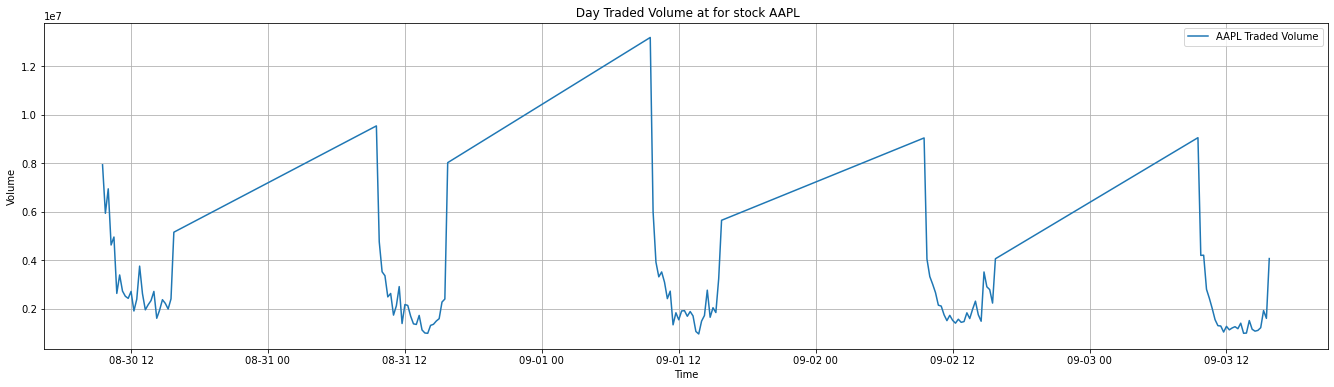

In [4]:
fig,ax = plt.subplots(figsize=(23,6))
ax.set_title(" Day Traded Volume at for stock AAPL")
ax.plot(Volume_DF.index,Volume_DF['AAPL'],label='AAPL Traded Volume')


ax.set_xlabel('Time')
ax.set_ylabel('Volume')
ax.legend()
ax.grid()
plt.show()

# Drop Untrading Time

In [5]:
def Address_Time(datetime):

    datetime = str(datetime)
    return datetime

Volume_DF['Datetime'] = Volume_DF.index
Volume_DF['Datetime'] =  Volume_DF.apply(lambda x : Address_Time(x['Datetime']),axis=1)
Volume_DF.index       = Volume_DF['Datetime']
Volume_DF             = Volume_DF.drop(['Datetime'],axis=1)
Volume_DF


,FB,AAPL
Datetime,,
2021-08-30 09:30:00-04:00,856726,7936202
2021-08-30 09:45:00-04:00,656908,5935508
2021-08-30 10:00:00-04:00,643745,6944952
2021-08-30 10:15:00-04:00,502498,4629778
2021-08-30 10:30:00-04:00,422328,4958212
...,...,...
2021-09-03 14:45:00-04:00,117520,1107862
2021-09-03 15:00:00-04:00,131934,1218916
2021-09-03 15:15:00-04:00,374011,1927238


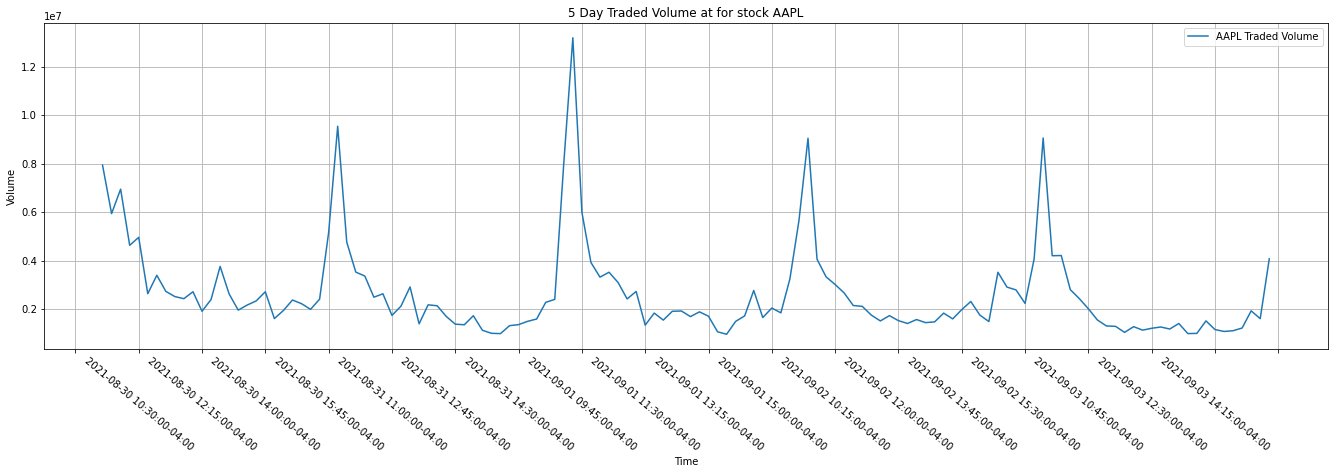

In [6]:
fig,ax = plt.subplots(figsize=(23,6))
ax.set_title("5 Day Traded Volume at for stock AAPL")
ax.plot(Volume_DF.index,Volume_DF['AAPL'],label='AAPL Traded Volume')

ax.set_xlabel('Time')
ax.set_ylabel('Volume')
ax.legend()
ax.grid()

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.xticks(rotation=-40)
plt.show()

# Single Day Trading Volume

In [7]:
period   = '1d'
interval = '5m'
tickers  =  ['FB','AAPL']

Volume_Data = Company_Intra_date_Volume_Data(tickers=tickers,period=period,interval=interval)
Volume_DF   = Volume_Data.get_volume_data()
Volume_DF


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,FB,AAPL
Datetime,,
2021-09-03 09:30:00-04:00,613887,5540241
2021-09-03 09:35:00-04:00,279975,1905250
2021-09-03 09:40:00-04:00,198864,1608183
2021-09-03 09:45:00-04:00,153125,1178345
2021-09-03 09:50:00-04:00,143546,1244112
...,...,...
2021-09-03 15:35:00-04:00,93806,558216
2021-09-03 15:40:00-04:00,82493,589798
2021-09-03 15:45:00-04:00,83668,757299


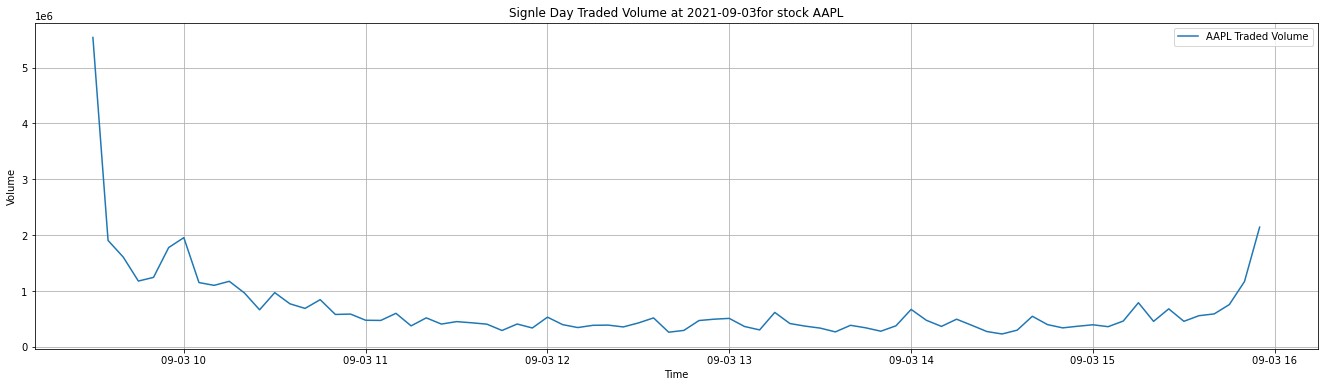

In [8]:

fig,ax = plt.subplots(figsize=(23,6))
ax.set_title('Signle Day Traded Volume at ' + str(Volume_DF.index[0])[:10] +"for stock AAPL")
ax.plot(Volume_DF.index,Volume_DF['AAPL'],label='AAPL Traded Volume')
ax.set_xlabel('Time')
ax.set_ylabel('Volume')
ax.legend()
ax.grid()
plt.show()